# Air Quality EDA Workflow
Goal: explore AQI and pollutant patterns across Indian cities, with yearly comparisons and city-specific drilldowns.

**Run order**
1) Setup + load `city_day.csv`
2) Basic profiling and datetime features
3) Correlation heatmap
4) City subsets (Jaipur, Delhi, Guwahati)
5) Year-by-year AQI & pollutant visuals (2019, 2020)
6) Multi-year city panels (2015-2020)
7) Missing-value check


In [91]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Setup
Import libraries for data handling and plotting.

In [92]:
#Importing the dataset
df = pd.read_csv("./datasets/city_day.csv")

## 2. Load data
Read the daily city-level AQI dataset.

In [62]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [64]:
# Basic preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,6
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,6
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,6


## 3. Basic profiling
Inspect schema, add year/month features for grouping.

[Text(0.5, 0, 'PM2.5'),
 Text(1.5, 0, 'PM10'),
 Text(2.5, 0, 'NO'),
 Text(3.5, 0, 'NO2'),
 Text(4.5, 0, 'NOx'),
 Text(5.5, 0, 'NH3'),
 Text(6.5, 0, 'CO'),
 Text(7.5, 0, 'SO2'),
 Text(8.5, 0, 'O3'),
 Text(9.5, 0, 'Benzene'),
 Text(10.5, 0, 'Toluene'),
 Text(11.5, 0, 'Xylene'),
 Text(12.5, 0, 'AQI')]

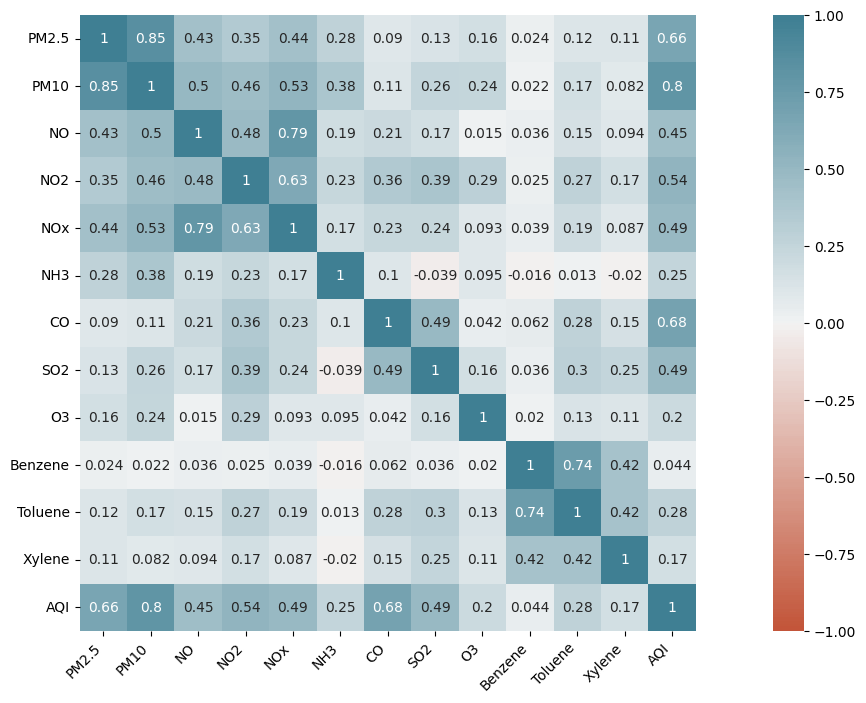

In [65]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=[np.number])
df_corr = df_numeric.corr()
df_corr = df_corr.drop(['Year','Month'], axis=1, errors='ignore')
df_corr = df_corr.drop(['Year','Month'], axis=0, errors='ignore')

plt.figure(figsize=(20,8))
ax = sns.heatmap(df_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## 4. Correlation heatmap
Check relationships between pollutants and AQI (numeric columns only).

In [66]:
#List of cities for which we have the data
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

## 5. Cities overview
List available cities and subset key ones for comparison.

In [67]:
#Extracting out the data for Jaiur, delhi and guwahati
jaipur = df[df['City'] == 'Jaipur']
delhi = df[df['City'] == 'Delhi']
guwahati = df[df['City'] == 'Guwahati']

In [68]:
jaipur

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
16587,Jaipur,2017-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6
16588,Jaipur,2017-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6
16589,Jaipur,2017-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6
16590,Jaipur,2017-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6
16591,Jaipur,2017-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,Jaipur,2020-06-27,28.33,76.66,6.15,14.72,18.14,21.82,0.59,9.96,39.12,0.23,0.59,NaN,89.0,Satisfactory,2020,6
17697,Jaipur,2020-06-28,23.76,67.44,5.60,14.05,17.20,20.41,0.50,8.93,34.40,0.16,0.39,NaN,75.0,Satisfactory,2020,6
17698,Jaipur,2020-06-29,30.58,77.30,6.21,16.63,19.50,22.70,0.55,10.59,39.21,0.22,0.47,NaN,69.0,Satisfactory,2020,6
17699,Jaipur,2020-06-30,30.03,64.26,5.48,13.77,16.94,19.79,0.67,10.36,50.71,0.48,1.48,NaN,79.0,Satisfactory,2020,6


In [69]:
jaipur.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
count,1114,1102.000000,1100.000000,1098.000000,1100.000000,1002.000000,1099.000000,1107.000000,1102.000000,1099.000000,1092.000000,1091.000000,0.0,1094.000000,1114.000000,1114.000000
mean,2018-12-22 12:00:00,54.500708,123.483509,14.632987,32.418627,39.637176,26.513494,0.800894,11.071062,46.715469,1.571172,6.685573,NaN,133.679159,2018.475763,6.514363
min,2017-06-14 00:00:00,9.120000,0.420000,0.440000,0.010000,6.040000,0.340000,0.000000,3.200000,0.240000,0.000000,0.000000,NaN,43.000000,2017.000000,1.000000
25%,2018-03-19 06:00:00,36.300000,86.357500,7.005000,21.155000,26.345000,18.180000,0.620000,9.290000,32.640000,0.480000,2.290000,NaN,96.000000,2018.000000,4.000000
50%,2018-12-22 12:00:00,49.750000,116.825000,10.525000,29.735000,34.585000,23.530000,0.770000,10.735000,45.680000,0.990000,4.720000,NaN,122.000000,2018.000000,6.000000
75%,2019-09-26 18:00:00,67.130000,153.072500,15.802500,40.365000,47.077500,30.955000,0.960000,12.535000,59.070000,2.060000,9.210000,NaN,159.000000,2019.000000,9.000000
max,2020-07-01 00:00:00,311.350000,491.010000,100.510000,118.920000,135.910000,87.280000,2.740000,27.320000,172.280000,13.640000,37.110000,NaN,457.000000,2020.000000,12.000000
std,NaN,26.551826,54.948563,13.454424,15.640016,20.624056,13.202486,0.391905,2.919111,21.121277,1.726622,6.259888,NaN,54.309341,0.969362,3.423174


## 6. Year 2020 analysis
AQI and pollutant patterns for Jaipur, Delhi, Guwahati.

In [70]:
jaipur_2020 = jaipur[jaipur['Year'] == 2020]
delhi_2020 = delhi[delhi['Year'] == 2020]
guwahati_2020 = guwahati[guwahati['Year'] == 2020]

In [71]:
jaipur_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
17518,Jaipur,2020-01-01,68.61,153.05,3.97,37.84,33.18,27.34,1.03,13.52,54.13,3.87,15.86,NaN,154.0,Moderate,2020,1
17519,Jaipur,2020-01-02,48.02,96.26,5.67,35.09,32.49,26.62,0.95,12.32,54.38,3.03,16.51,NaN,153.0,Moderate,2020,1
17520,Jaipur,2020-01-03,47.44,119.11,7.54,45.51,44.62,33.84,0.81,10.76,41.04,3.83,19.94,NaN,108.0,Moderate,2020,1
17521,Jaipur,2020-01-04,52.46,120.23,14.72,47.22,55.68,47.90,1.11,10.01,36.18,4.51,23.90,NaN,111.0,Moderate,2020,1
17522,Jaipur,2020-01-05,66.18,143.95,22.43,49.72,69.22,57.93,1.20,14.26,30.41,6.86,37.11,NaN,138.0,Moderate,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,Jaipur,2020-06-27,28.33,76.66,6.15,14.72,18.14,21.82,0.59,9.96,39.12,0.23,0.59,NaN,89.0,Satisfactory,2020,6
17697,Jaipur,2020-06-28,23.76,67.44,5.60,14.05,17.20,20.41,0.50,8.93,34.40,0.16,0.39,NaN,75.0,Satisfactory,2020,6
17698,Jaipur,2020-06-29,30.58,77.30,6.21,16.63,19.50,22.70,0.55,10.59,39.21,0.22,0.47,NaN,69.0,Satisfactory,2020,6
17699,Jaipur,2020-06-30,30.03,64.26,5.48,13.77,16.94,19.79,0.67,10.36,50.71,0.48,1.48,NaN,79.0,Satisfactory,2020,6


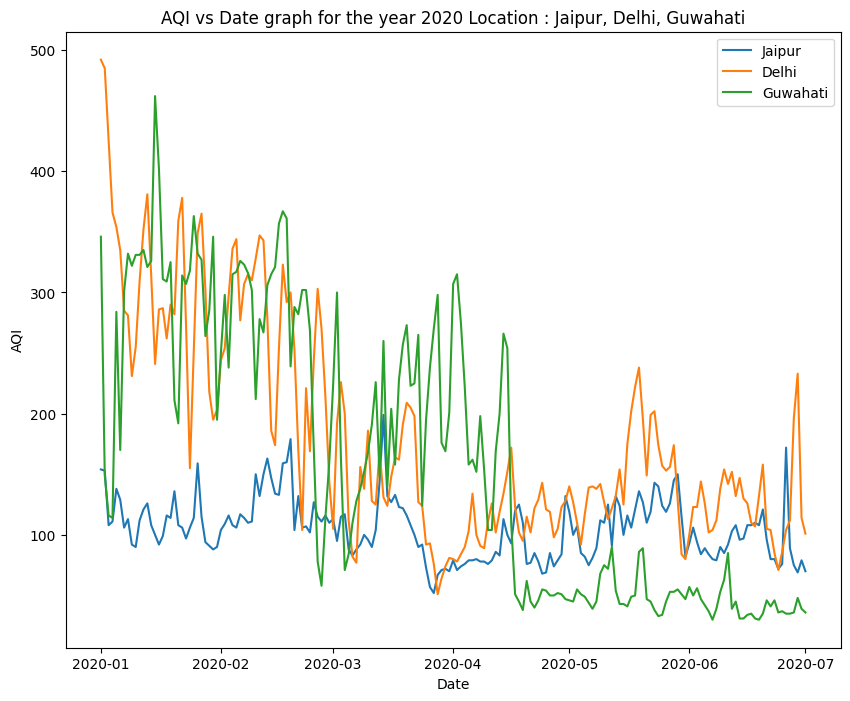

In [72]:
#Plotting the AQI vs Date graph for Jaipur, Delhi and Guwahati

plt.figure(figsize=(10,8))
plt.plot(jaipur_2020['Date'],jaipur_2020['AQI'])
plt.plot(delhi_2020['Date'],delhi_2020['AQI'])
plt.plot(guwahati_2020['Date'],guwahati_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Jaipur, Delhi, Guwahati")
plt.legend(["Jaipur", "Delhi","Guwahati"])

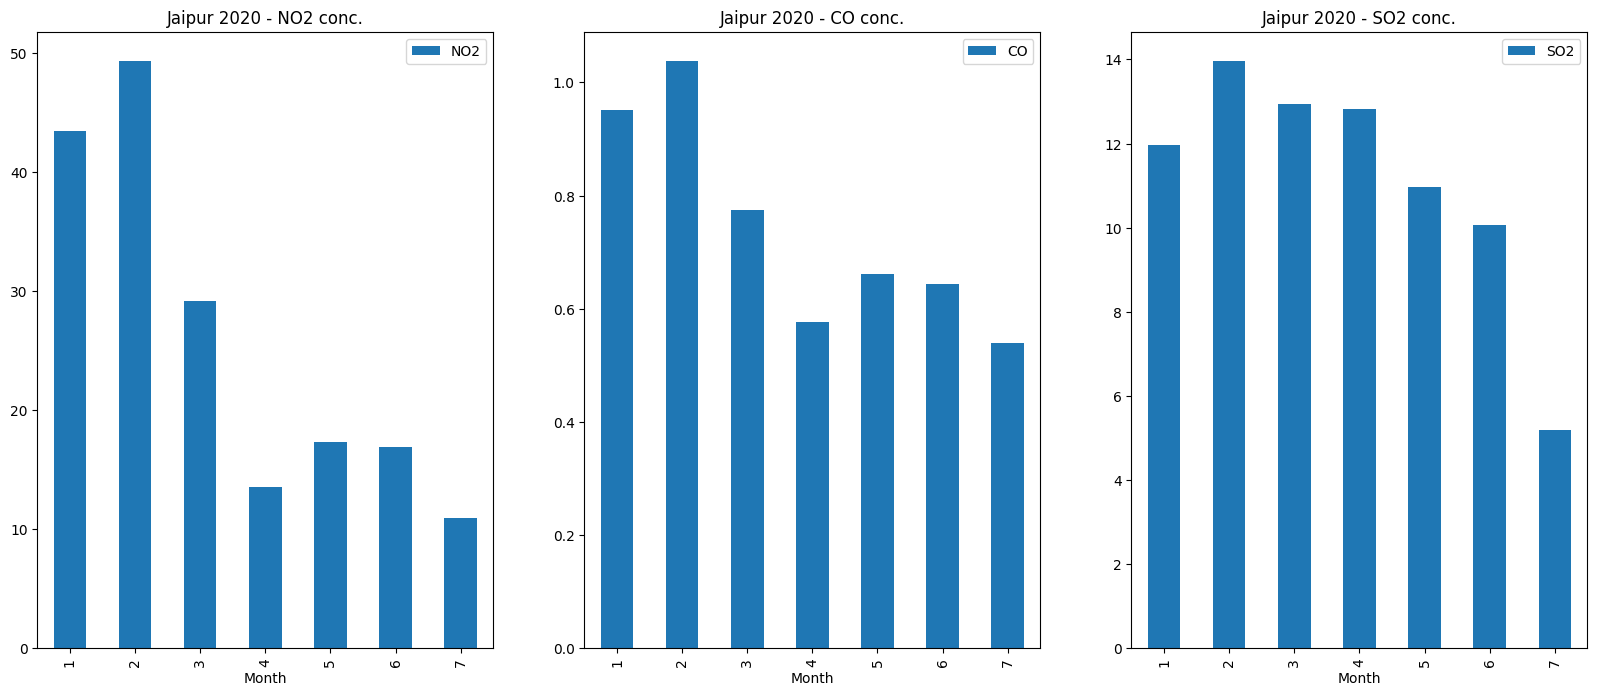

In [73]:
#Plotting the NO2, CO and SO2 concentrations in the city of Jaipur

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Jaipur 2020 - NO2 conc.")
jaipur_2020.groupby(jaipur_2020['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax1)
ax2.title.set_text("Jaipur 2020 - CO conc.")
jaipur_2020.groupby(jaipur_2020['Month'])[['CO']].mean().plot(kind = 'bar',ax = ax2)
ax3.title.set_text("Jaipur 2020 - SO2 conc.")
jaipur_2020.groupby(jaipur_2020['Month'])[['SO2']].mean().plot(kind = 'bar',ax = ax3)

plt.show()

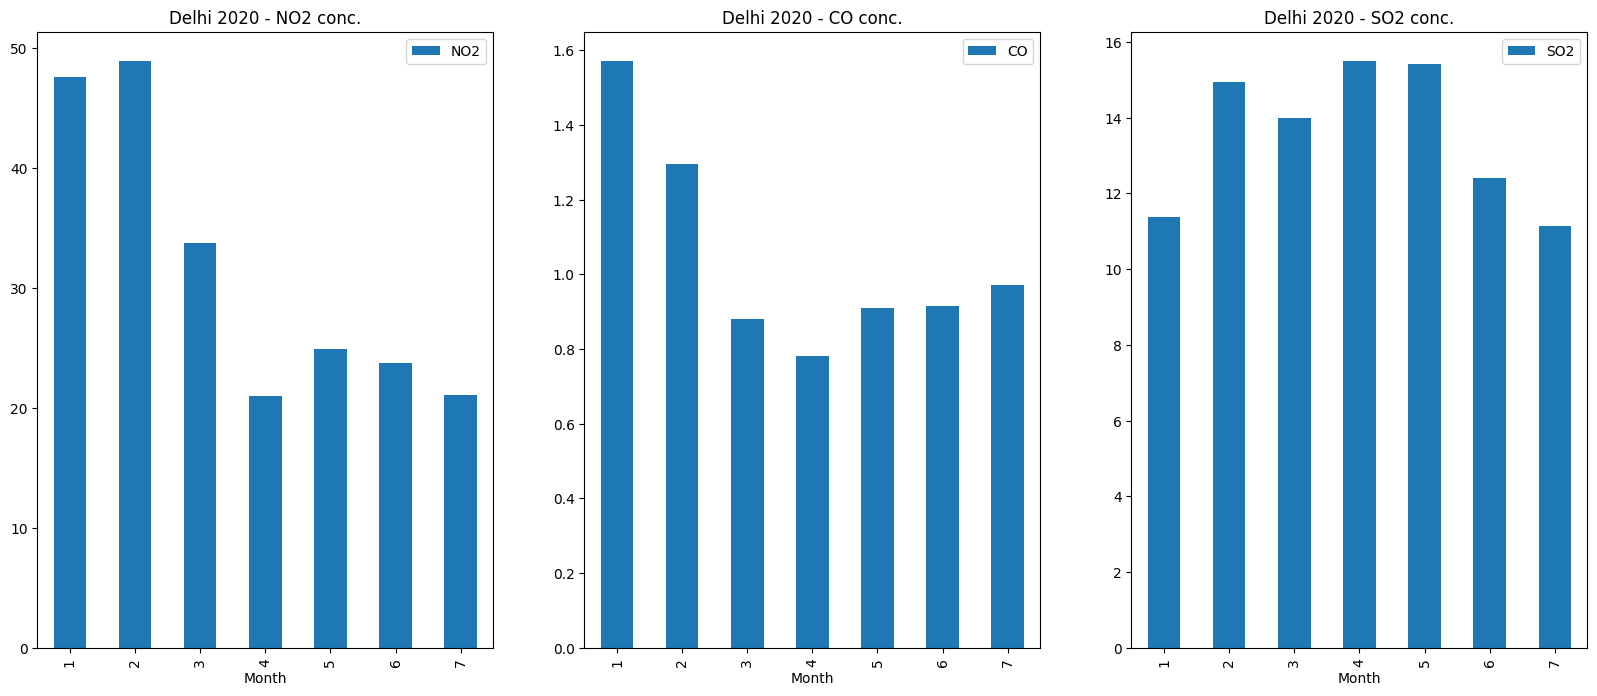

In [74]:
#Plotting the NO2, CO and SO2 concentrations in the city of Delhi

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Delhi 2020 - NO2 conc.")
delhi_2020.groupby(delhi_2020['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax1)
ax2.title.set_text("Delhi 2020 - CO conc.")
delhi_2020.groupby(delhi_2020['Month'])[['CO']].mean().plot(kind = 'bar',ax = ax2)
ax3.title.set_text("Delhi 2020 - SO2 conc.")
delhi_2020.groupby(delhi_2020['Month'])[['SO2']].mean().plot(kind = 'bar',ax = ax3)

plt.show()

## 7. Year 2019 analysis
Repeat AQI/pollutant views for 2019 to compare against 2020.

In [75]:
jaipur_2019 = jaipur[jaipur['Year'] == 2019]
delhi_2019 = delhi[delhi['Year'] == 2019]
guwahati_2019 = guwahati[guwahati['Year'] == 2019]

In [76]:
jaipur_2019

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
17153,Jaipur,2019-01-01,113.17,212.37,70.73,47.56,103.19,30.17,1.84,16.89,36.04,2.97,11.38,NaN,275.0,Poor,2019,1
17154,Jaipur,2019-01-02,76.03,190.06,63.37,46.22,90.90,25.62,1.66,15.89,32.90,2.53,8.67,NaN,173.0,Moderate,2019,1
17155,Jaipur,2019-01-03,98.19,167.25,26.38,45.85,56.90,24.20,1.12,19.49,30.52,1.70,7.58,NaN,232.0,Poor,2019,1
17156,Jaipur,2019-01-04,65.04,140.16,18.83,38.01,44.36,21.58,1.06,22.65,37.85,1.63,7.68,NaN,203.0,Poor,2019,1
17157,Jaipur,2019-01-05,63.41,130.37,6.08,25.45,23.06,19.01,0.80,13.07,61.45,1.31,8.01,NaN,134.0,Moderate,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,Jaipur,2019-12-27,55.55,151.74,41.42,77.26,96.65,52.73,1.30,13.06,29.57,6.61,23.82,NaN,145.0,Moderate,2019,12
17514,Jaipur,2019-12-28,64.59,164.04,24.38,78.18,82.95,51.35,1.18,11.23,36.27,6.80,22.56,NaN,144.0,Moderate,2019,12
17515,Jaipur,2019-12-29,71.03,156.69,13.85,70.77,70.51,49.52,1.28,11.57,29.60,7.26,24.67,NaN,146.0,Moderate,2019,12
17516,Jaipur,2019-12-30,80.04,183.66,8.70,60.65,55.85,41.64,1.24,12.76,37.50,6.99,23.31,NaN,182.0,Moderate,2019,12


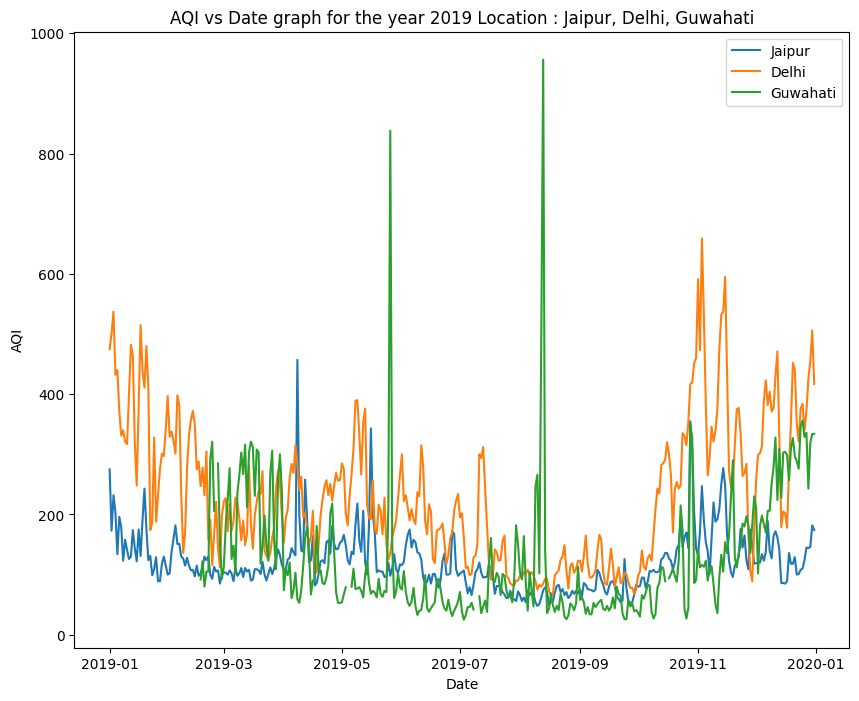

In [77]:
#Plotting the AQI vs Date graph for Jaipur, Delhi and Guwahati

plt.figure(figsize=(10,8))
plt.plot(jaipur_2019['Date'],jaipur_2019['AQI'])
plt.plot(delhi_2019['Date'],delhi_2019['AQI'])
plt.plot(guwahati_2019['Date'],guwahati_2019['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2019 Location : Jaipur, Delhi, Guwahati")
plt.legend(["Jaipur", "Delhi","Guwahati"])

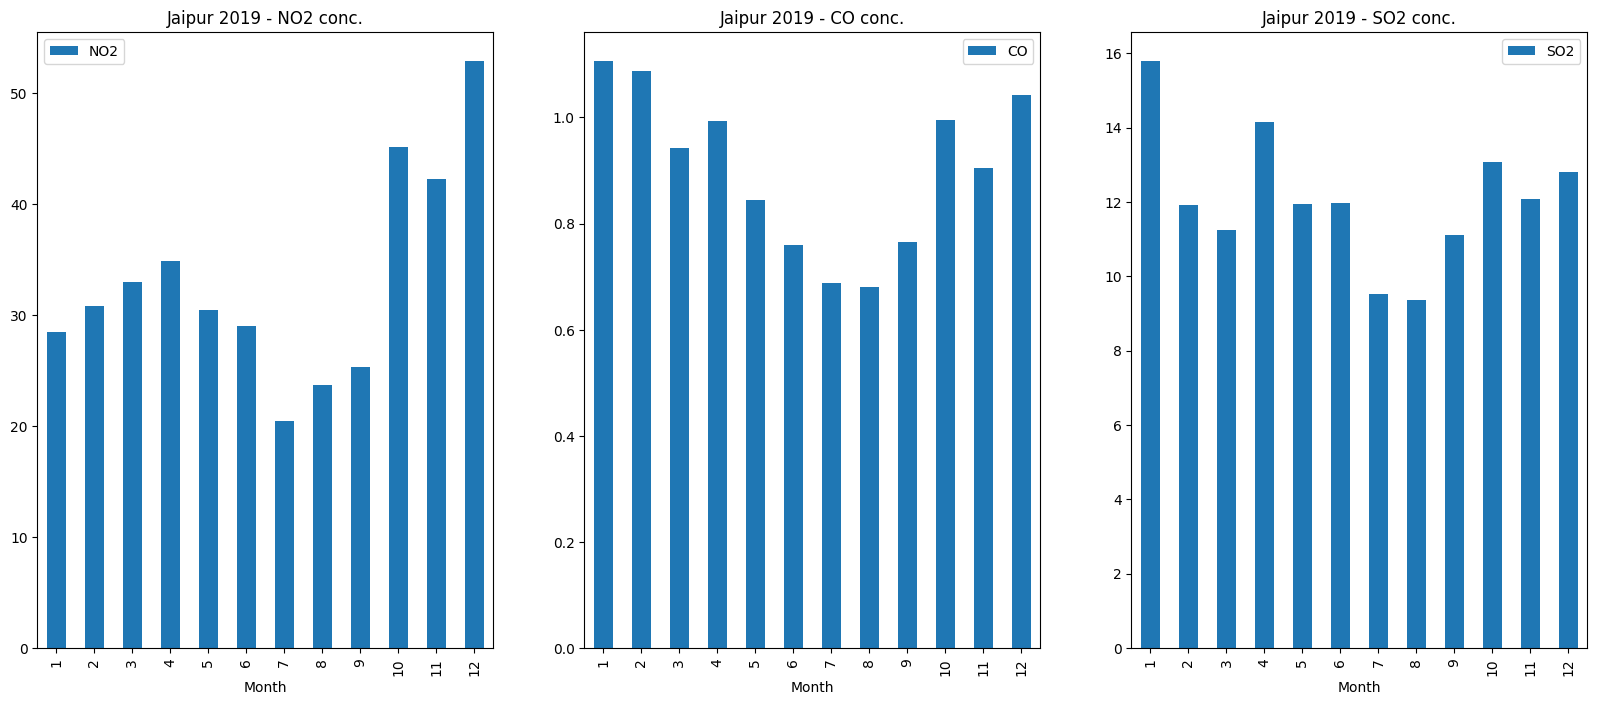

In [78]:
#Plotting the NO2, CO and SO2 concentrations in the city of Jaipur

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,8))
ax1.title.set_text("Jaipur 2019 - NO2 conc.")
jaipur_2019.groupby(jaipur_2019['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax1)
ax2.title.set_text("Jaipur 2019 - CO conc.")
jaipur_2019.groupby(jaipur_2019['Month'])[['CO']].mean().plot(kind = 'bar',ax = ax2)
ax3.title.set_text("Jaipur 2019 - SO2 conc.")
jaipur_2019.groupby(jaipur_2019['Month'])[['SO2']].mean().plot(kind = 'bar',ax = ax3)

plt.show()

In [87]:
jaipur_2019.select_dtypes(include=[np.number]).groupby(jaipur_2019['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
Month,,,,,,,,,,,,,,,
1,62.399355,138.533548,20.641290,28.460000,40.367742,23.159677,1.105806,15.781290,41.652581,1.533548,7.366452,NaN,150.290323,2019.0,1.0
2,48.775714,109.558214,13.617857,30.768571,36.858571,26.302857,1.088214,11.921786,44.648214,1.028214,8.530357,NaN,118.714286,2019.0,2.0
3,40.841613,100.275806,12.277419,33.017742,37.752903,25.023226,0.941613,11.250323,54.540323,1.015484,6.521290,NaN,106.774194,2019.0,3.0
4,51.480000,154.143333,16.922000,34.851667,42.687000,28.315333,0.992667,14.157667,61.311000,1.000333,5.538667,NaN,151.000000,2019.0,4.0
5,57.200645,148.000323,15.406774,30.480323,39.197742,21.542258,0.845161,11.930645,50.805161,0.815806,5.052581,NaN,142.161290,2019.0,5.0
6,46.777667,118.850000,9.909667,29.043667,33.187667,25.974000,0.758667,11.978000,54.624333,0.725000,3.128333,NaN,119.966667,2019.0,6.0
7,35.388065,79.222581,7.332903,20.474194,23.853548,21.877742,0.687097,9.518387,33.311613,0.371290,2.764516,NaN,84.806452,2019.0,7.0
8,26.462903,56.802903,10.109355,23.703871,28.120000,31.181613,0.680645,9.358710,25.318710,0.382258,3.251613,NaN,65.838710,2019.0,8.0
9,31.081667,67.464333,9.050667,25.319667,28.509667,39.725667,0.765667,11.097667,30.096667,0.580667,4.151000,NaN,76.333333,2019.0,9.0


In [88]:
jaipur_2020.select_dtypes(include=[np.number]).groupby(jaipur_2020['Month']).mean()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year,Month
Month,,,,,,,,,,,,,,,
1,47.088710,106.641290,13.112581,43.505806,48.659677,38.495806,0.950645,11.964194,45.015161,3.511290,11.210645,NaN,112.451613,2020.0,1.0
2,55.228276,123.383793,17.603103,49.343793,56.297931,36.126897,1.037586,13.959310,55.135172,4.024828,9.638276,NaN,125.241379,2020.0,2.0
3,34.323548,82.639677,6.407419,29.194839,29.451290,32.943548,0.773548,12.932258,63.637097,1.614839,22.202581,NaN,100.935484,2020.0,3.0
4,28.631333,75.736667,3.381000,13.514333,14.294667,19.785333,0.576667,12.830667,50.942333,0.632333,9.404333,NaN,86.200000,2020.0,4.0
5,41.107097,111.717742,4.226129,17.301290,18.259032,25.015484,0.661290,10.955161,59.406452,1.217742,1.793548,NaN,113.258065,2020.0,5.0
6,35.321333,84.852000,5.557000,16.859000,19.571000,26.176667,0.643000,10.054333,59.226333,0.681667,1.234333,NaN,94.100000,2020.0,6.0
7,58.790000,103.680000,5.190000,10.880000,14.160000,17.410000,0.540000,5.190000,53.680000,0.220000,0.460000,NaN,70.000000,2020.0,7.0


## 8. 2019 vs 2020 side-by-side
Bar charts comparing pollutant means by month across the two years.

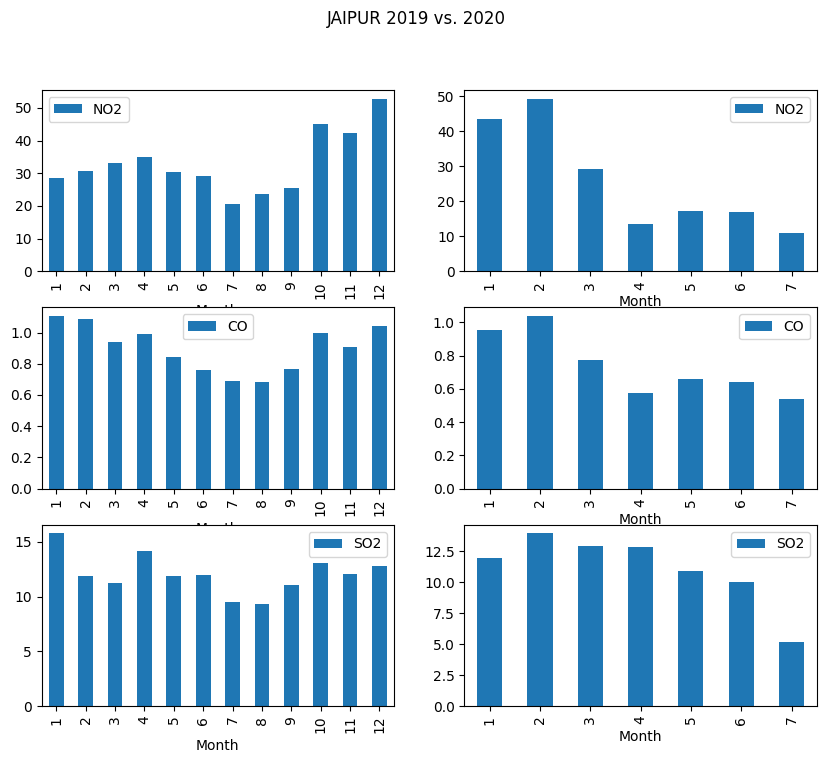

In [89]:
#Comparing the NO2,CO,SO2 concentrations for the city of Jaipur during the year 2019 and 2020 

fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("JAIPUR 2019 vs. 2020")
jaipur_2019.groupby(jaipur_2019['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax[0,0])
jaipur_2020.groupby(jaipur_2020['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax[0,1])
jaipur_2019.groupby(jaipur_2019['Month'])[['CO']].mean().plot(kind = 'bar',ax =ax[1,0])
jaipur_2020.groupby(jaipur_2020['Month'])[['CO']].mean().plot(kind = 'bar',ax =ax[1,1])
jaipur_2019.groupby(jaipur_2019['Month'])[['SO2']].mean().plot(kind = 'bar',ax =ax[2,0])
jaipur_2020.groupby(jaipur_2020['Month'])[['SO2']].mean().plot(kind = 'bar',ax =ax[2,1])

plt.show()

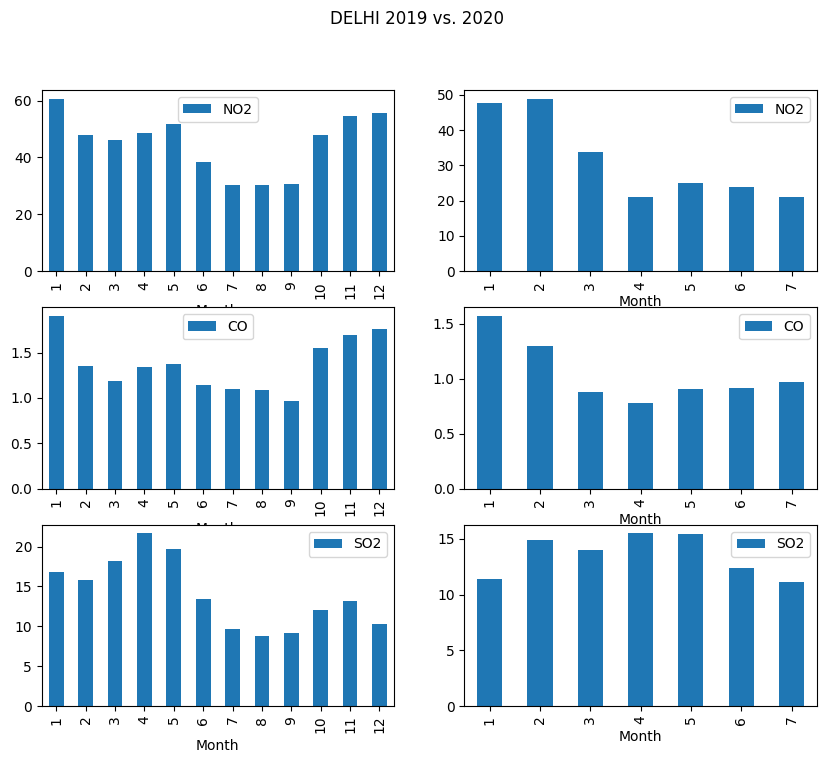

In [90]:
#Comparing the NO2,CO,SO2 concentrations for the city of Delhi during the year 2019 and 2020

fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("DELHI 2019 vs. 2020")
delhi_2019.groupby(delhi_2019['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax[0,0])
delhi_2020.groupby(delhi_2020['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax[0,1])
delhi_2019.groupby(delhi_2019['Month'])[['CO']].mean().plot(kind = 'bar',ax =ax[1,0])
delhi_2020.groupby(delhi_2020['Month'])[['CO']].mean().plot(kind = 'bar',ax =ax[1,1])
delhi_2019.groupby(delhi_2019['Month'])[['SO2']].mean().plot(kind = 'bar',ax =ax[2,0])
delhi_2020.groupby(delhi_2020['Month'])[['SO2']].mean().plot(kind = 'bar',ax =ax[2,1])

plt.show()

## 9. Multi-year panels (2015-2020)
City-specific AQI/NO₂ panels to spot longer-term patterns.

In [ ]:
jaipur_2018 = jaipur[jaipur['Year'] == 2018]
jaipur_2017 = jaipur[jaipur['Year'] == 2017]
jaipur_2016 = jaipur[jaipur['Year'] == 2016]
jaipur_2015 = jaipur[jaipur['Year'] == 2015]

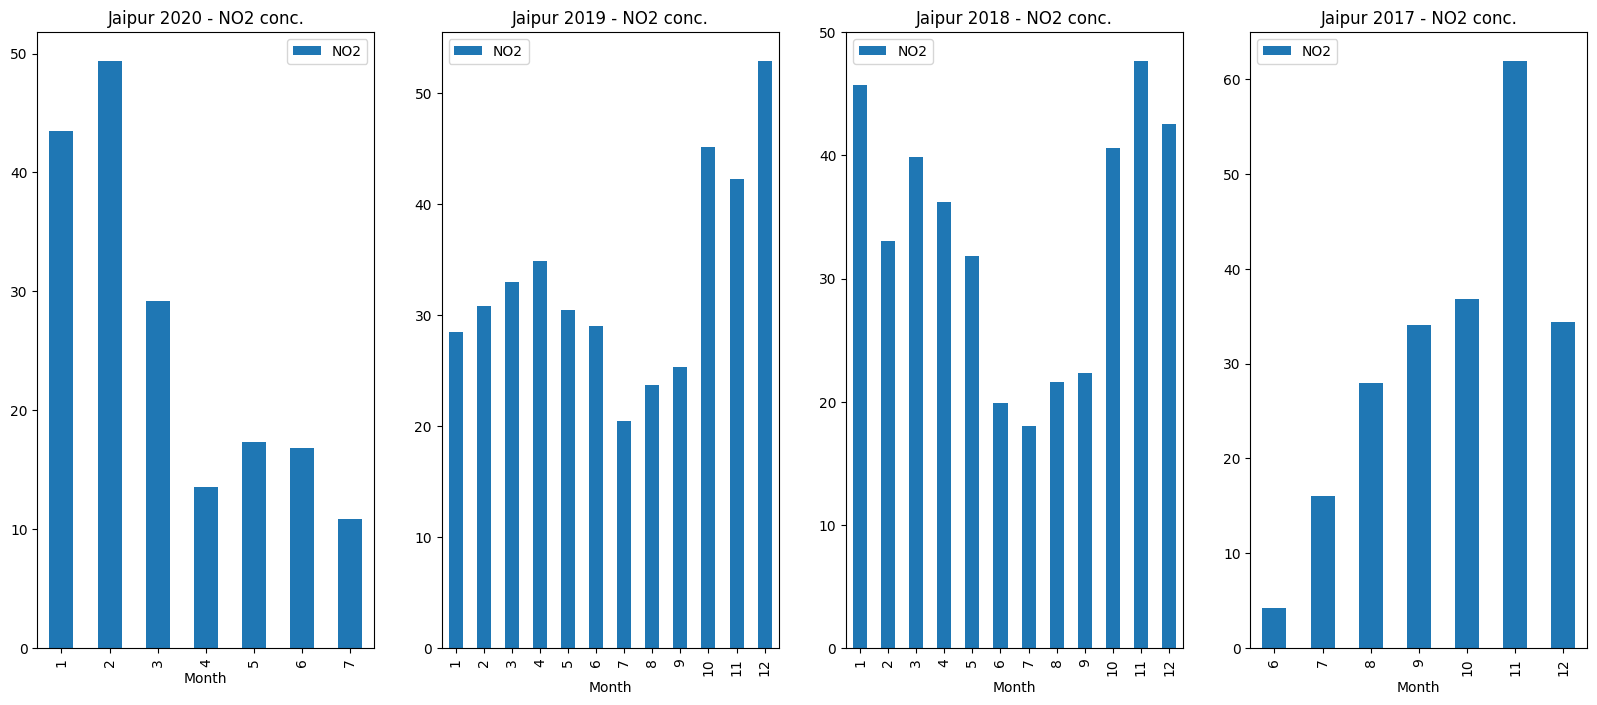

In [80]:
#plotting the NO2 concentration for the city of Jaipur during the year 2017-20
#(2015,2016) data is not available for Jaipur

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (20,8))

ax1.title.set_text("Jaipur 2020 - NO2 conc.")
jaipur_2020.groupby(jaipur_2020['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax1)

ax2.title.set_text("Jaipur 2019 - NO2 conc.")
jaipur_2019.groupby(jaipur_2019['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax2)

ax3.title.set_text("Jaipur 2018 - NO2 conc.")
jaipur_2018.groupby(jaipur_2018['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax3)

ax4.title.set_text("Jaipur 2017 - NO2 conc.")
jaipur_2017.groupby(jaipur_2017['Month'])[['NO2']].mean().plot(kind = 'bar',ax =ax4)

plt.show()

In [81]:
delhi_2018 = delhi[delhi['Year'] == 2018]
delhi_2017 = delhi[delhi['Year'] == 2017]
delhi_2016 = delhi[delhi['Year'] == 2016]
delhi_2015 = delhi[delhi['Year'] == 2015]

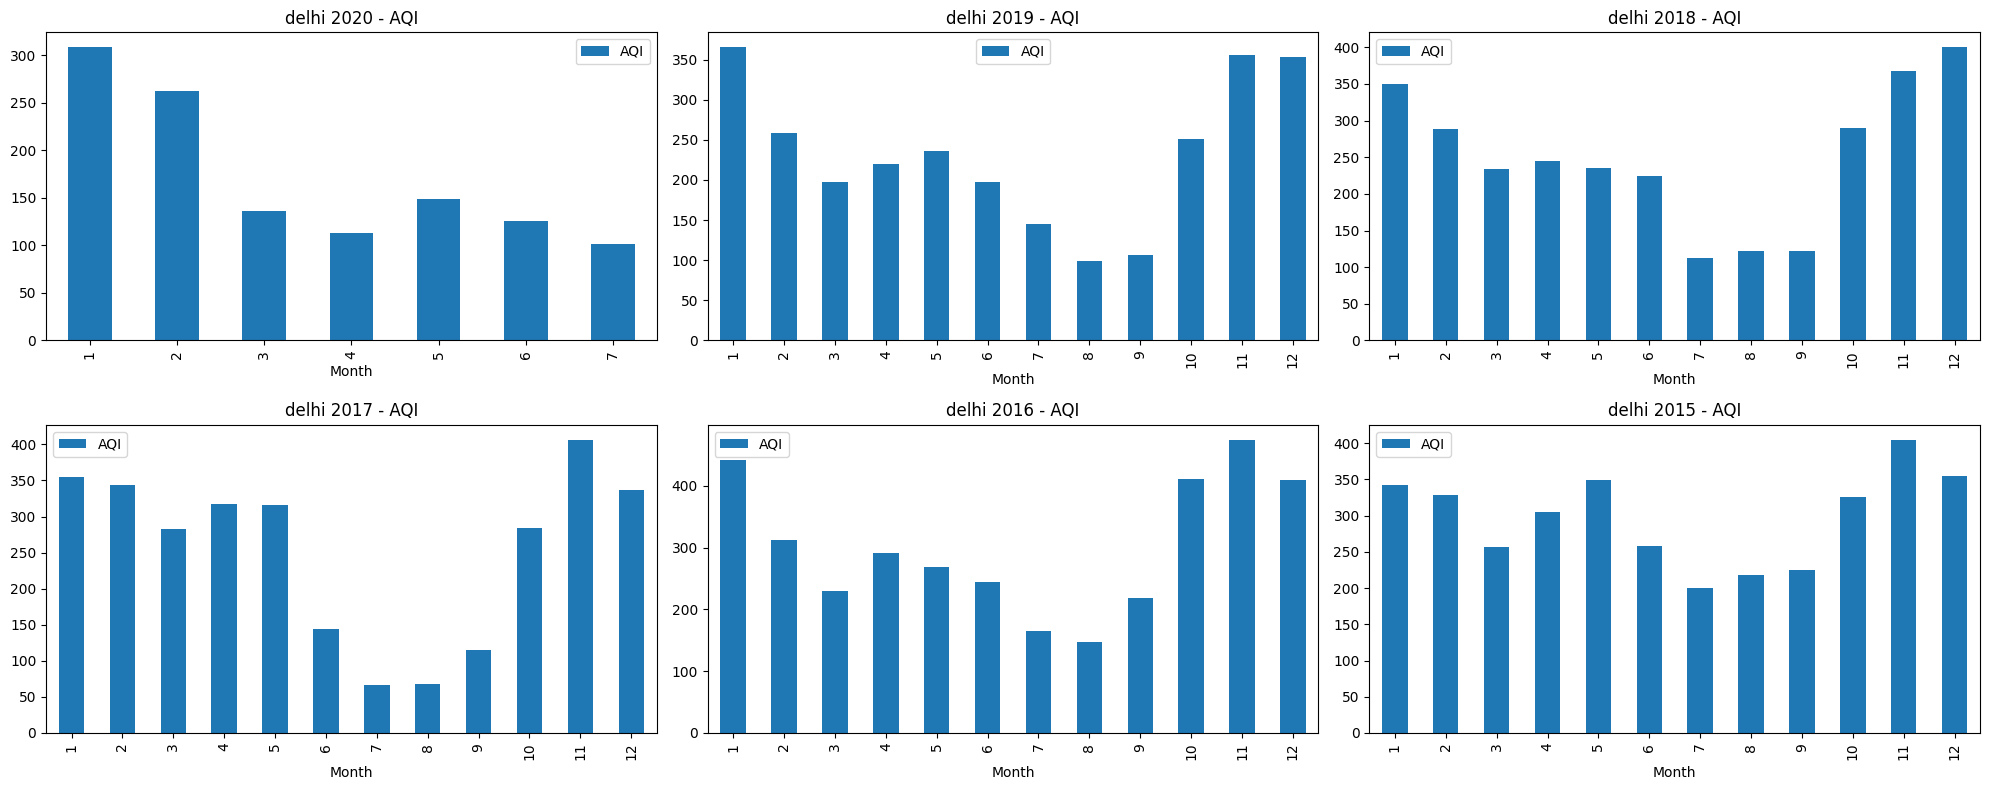

In [82]:
#plotting the NO2 concentration for the city of Delhi during the year 2015-2020

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,8))

ax1.title.set_text("delhi 2020 - AQI")
delhi_2020.groupby(delhi_2020['Month'])[['AQI']].mean().plot(kind = 'bar',ax =ax1)

ax2.title.set_text("delhi 2019 - AQI")
delhi_2019.groupby(delhi_2019['Month'])[['AQI']].mean().plot(kind = 'bar',ax =ax2)

ax3.title.set_text("delhi 2018 - AQI")
delhi_2018.groupby(delhi_2018['Month'])[['AQI']].mean().plot(kind = 'bar',ax =ax3)

ax4.title.set_text("delhi 2017 - AQI")
delhi_2017.groupby(delhi_2017['Month'])[['AQI']].mean().plot(kind = 'bar',ax =ax4)

ax5.title.set_text("delhi 2016 - AQI")
delhi_2016.groupby(delhi_2016['Month'])[['AQI']].mean().plot(kind = 'bar',ax = ax5)

ax6.title.set_text("delhi 2015 - AQI")
delhi_2015.groupby(delhi_2015['Month'])[['AQI']].mean().plot(kind = 'bar',ax = ax6)

plt.tight_layout()
plt.show()

In [83]:
delhi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2009 entries, 10229 to 12237
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       2007 non-null   float64       
 3   PM10        1932 non-null   float64       
 4   NO          2007 non-null   float64       
 5   NO2         2007 non-null   float64       
 6   NOx         2009 non-null   float64       
 7   NH3         2000 non-null   float64       
 8   CO          2009 non-null   float64       
 9   SO2         1899 non-null   float64       
 10  O3          1925 non-null   float64       
 11  Benzene     2009 non-null   float64       
 12  Toluene     2009 non-null   float64       
 13  Xylene      1228 non-null   float64       
 14  AQI         1999 non-null   float64       
 15  AQI_Bucket  1999 non-null   object        
 16  Year        2009 non-nul

## 10. Missing values
Check null counts to understand data completeness.

In [84]:
#Function to check the amount of missing values

def missing_values_table(df):
    table = pd.DataFrame(df.isnull().sum(), columns = ['count'])
    table['percentage'] = round((table['count']/df.shape[0])*100,2)
    return table

In [85]:
missing_values_table(delhi)

,count,percentage
City,0,0.00
Date,0,0.00
PM2.5,2,0.10
PM10,77,3.83
NO,2,0.10
NO2,2,0.10
NOx,0,0.00
NH3,9,0.45
CO,0,0.00
SO2,110,5.48
